In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data, target = make_moons(n_samples=300, random_state=42)

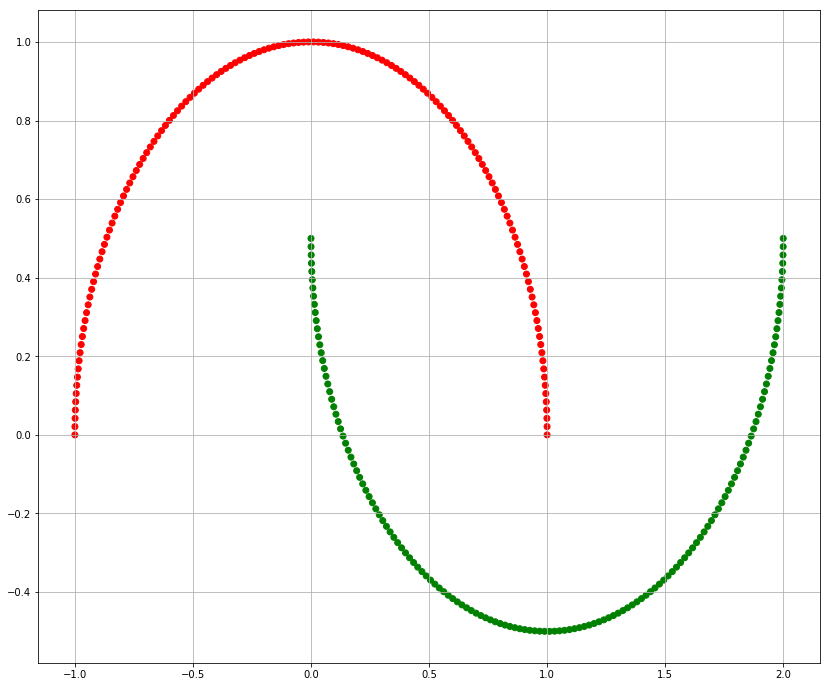

In [3]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in target]);
plt.grid(True);

In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
clusters = kmeans.fit_predict(data)

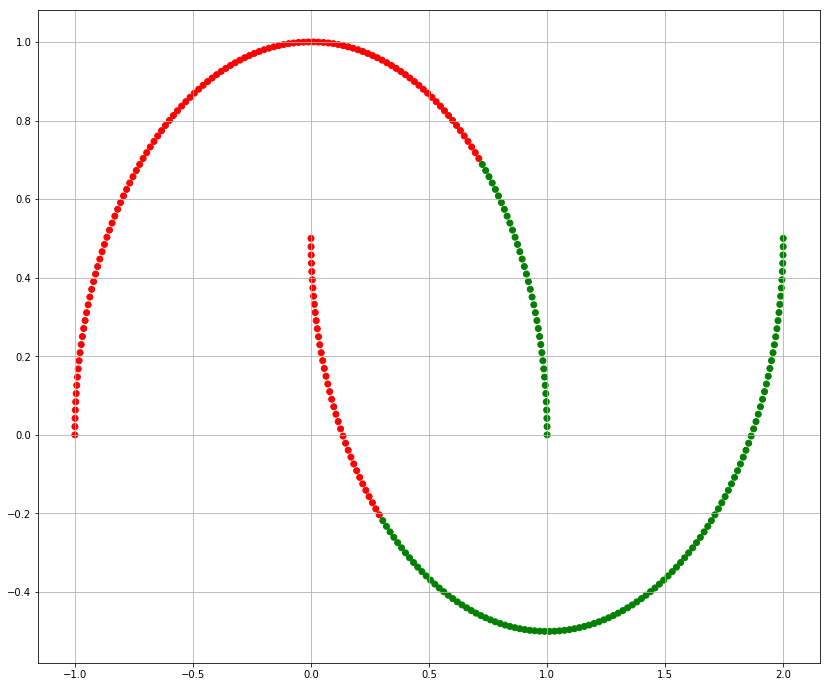

In [6]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in clusters]);
plt.grid(True);

# DBSCAN

<p>Основанная на плотности пространственная кластеризация для приложений с шумами (англ. Density-based spatial clustering of applications with noise, DBSCAN) — Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко). DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации, и наиболее часто упоминается в научной литературе.</p>

<p>В 2014 алгоритм получил премию «проверено временем» (премия даётся алгоритмам, которые получили существенное внимание в теории и практике) на ведущей конференции по интеллектуальному анализу данных</p>

## Алгоритм

<p>Рассмотрим набор точек в некотором пространстве, требующий кластеризации. Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:</p>

- Точка p является основной точкой, если по меньшей мере minPts точек находятся на расстоянии, не превосходящем $\epsilon$  ($\epsilon$  является максимальным радиусом соседства от p), до неё (включая саму точку p). Говорят, что эти точки достижимы прямо из p.
- Точка q прямо достижима из p, если точка q находится на расстоянии, не большем $\epsilon$, от точки p и p должна быть основной точкой.
- Точка A q достижима из p, если имеется путь $p_{1},\dots ,p_{n}$ с $p_{1}=p$ и $p_{n}=q$, где каждая точка $p_{i+1}$ достижима прямо из $p_{i}$ (все точки на пути должны быть основными, за исключением q).
- Все точки, не достижимые из основных точек, считаются выбросами.

<p>Теперь, если p является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимые из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.</p>

<p>DBSCAN требует задания двух параметров: $\epsilon$  и минимального числа точек, которые должны образовывать плотную область (minPts).</p>

<p>Алгоритм начинается с произвольной точки, которая ещё не просматривалась. Выбирается $\epsilon$ - окрестность точки и, если она содержит достаточно много точек, образуется кластер, в противном случае точка помечается как шум. Заметим, что эта точка может быть позже найдена в $\epsilon$ - окрестности другой точки и включена в какой-то кластер.</p>

<p>Если точка найдена как плотная точка кластера, её $\epsilon$ - окрестность также является частью этого кластера. Следовательно, все точки, найденные в $\epsilon$ - окрестности этой точки, добавляются к кластеру. Этот процесс продолжается, пока не будет найден связный по плотности кластер. Затем выбирается и обрабатывается новая непосещённая точка, что ведёт к обнаружению следующего кластера или шума.</p>

<p>DBSCAN может быть использован с любой функцией расстояния</p>

In [7]:
def range_query(db, q):
    distance = cdist(db, np.expand_dims(q, 0))
    return distance[:, 0]

In [8]:
eps = 0.1
min_pts = 8
count = -1
labels = np.full(shape=(data.shape[0], ), fill_value=-2)
for i in range(data.shape[0]):
    point = data[i]
    if labels[i] != -2:
        continue
    distance = range_query(data, point)
    if data[distance < eps].shape[0] < min_pts:
        labels[i] = -1
        continue
    count += 1
    labels[i] = count
    idx = [k for k in np.where(distance < eps)[0] if k != i]
    used_id = np.where(distance < eps)[0]
    not_used = data[idx]
    for j in range(not_used.shape[0]):
        if labels[idx[j]] == -1:
            labels[idx[j]] = count
        elif labels[idx[j]] != -2:
            continue
        else:
            labels[idx[j]] = count
            distance = range_query(data, not_used[j])
            idx2 = np.where(distance < eps)[0]
            if idx2.shape[0] >= min_pts:
                additional_id = [k for k in idx2 if k not in used_id]
                used_id = np.append(used_id, idx2)

In [9]:
eps = 0.1
min_pts = 8
count = -1
labels = np.full(shape=(data.shape[0], ), fill_value=-2)
for i in range(data.shape[0]):
    point = data[i]
    if labels[i] != -2:
        continue
    distance = range_query(data, point)
    if data[distance < eps].shape[0] < min_pts:
        labels[i] = -1
        continue
    count += 1
    labels[i] = count
    idx = np.array([k for k in np.where(distance < eps)[0] if k != i])
    used_id = np.where(distance < eps)[0]
    j = -1
    while j < idx.shape[0] - 1:
        j += 1
        if labels[idx[j]] == -1:
            labels[idx[j]] = count
        elif labels[idx[j]] != -2:
            continue
        else:
            labels[idx[j]] = count
            distance = range_query(data, data[idx[j]])
            idx2 = np.where(distance < eps)[0]
            if idx2.shape[0] >= min_pts:
                additional_id = [k for k in idx2 if k not in used_id]
                idx = np.append(idx, additional_id)

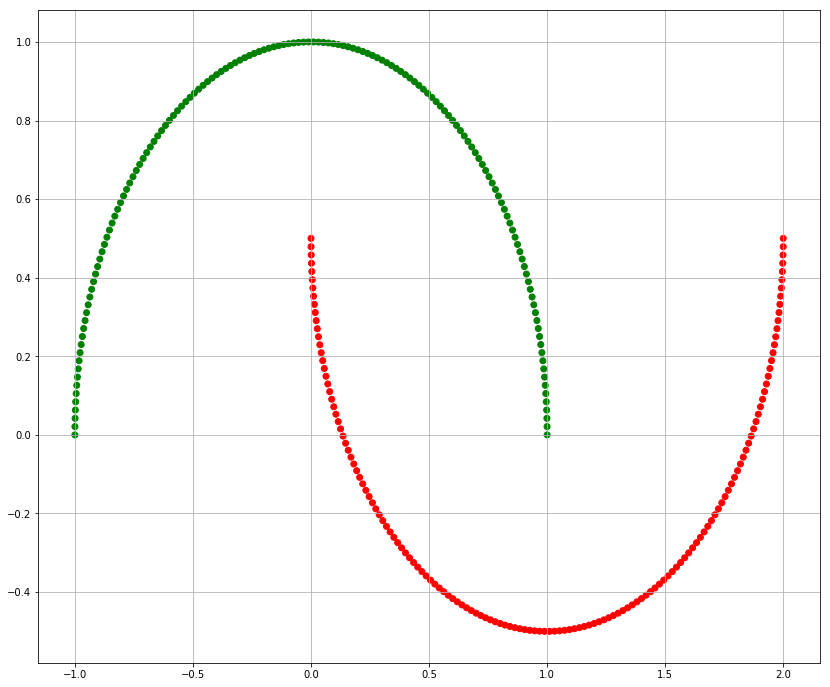

In [10]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in labels]);
plt.grid(True);

<p>В sklearn DBSCAN находится в модуле clusters, класс DBSCAN</p>

In [11]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')

In [12]:
labels = dbscan.fit_predict(data)

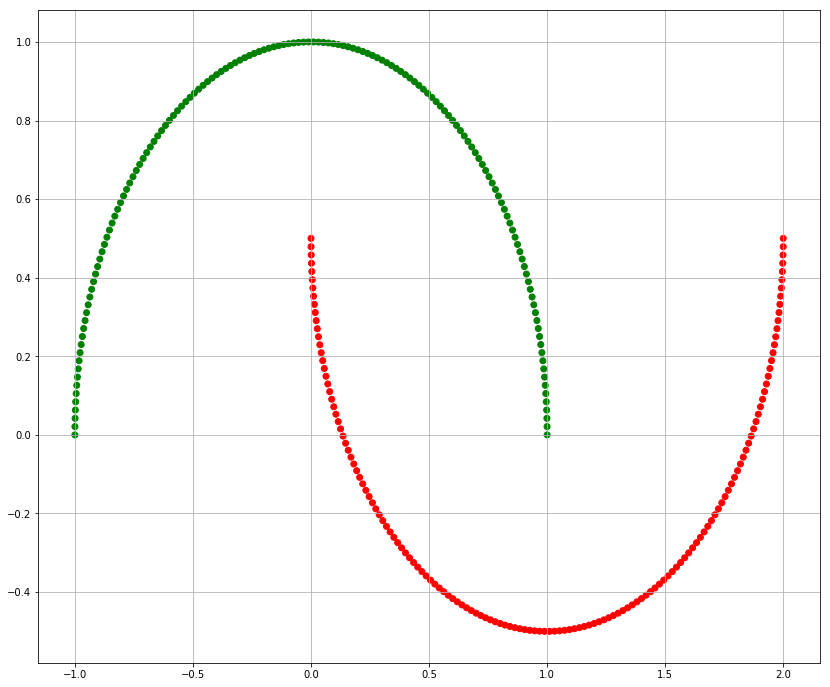

In [13]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(14, 12));
plt.scatter(data[:, 0], data[:, 1], color=[colors[var] for var in labels]);
plt.grid(True);